# Exploratory data analysis

# EDA on StudentsPerformance

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading file 

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.shape

(1000, 8)

In [3]:
data.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
833,female,group B,high school,standard,completed,77,82,89
429,male,group C,some high school,free/reduced,none,68,63,54
590,male,group C,some college,free/reduced,none,58,57,54
9,female,group B,high school,free/reduced,none,38,60,50
554,male,group E,associate's degree,standard,none,53,45,40
961,female,group D,some high school,free/reduced,none,48,54,53
927,female,group D,high school,free/reduced,completed,65,61,71
397,female,group C,associate's degree,standard,none,85,89,95
445,female,group C,some high school,standard,completed,67,74,77
474,female,group B,associate's degree,standard,completed,90,90,91


In [4]:
# information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# decsribing the data

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# finding mean score of the total subjects

In [6]:
data["mean score"] = ((data["math score"] + data["reading score"] + data["writing score"]) / 3 ).round()
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


In [9]:
#count female and males in class
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

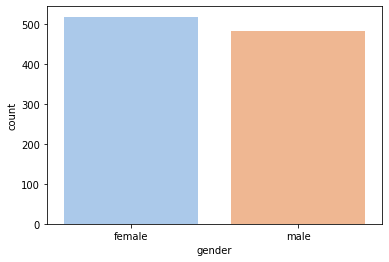

In [11]:
# visualizing the gender of students

sns.countplot(data['gender'], palette = 'pastel')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

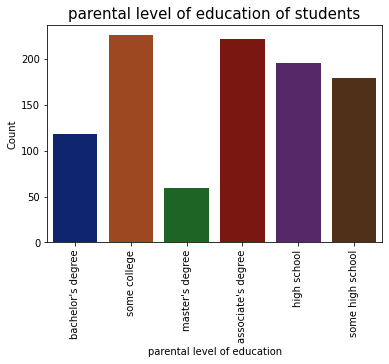

In [14]:
sns.countplot(data['parental level of education'], palette = 'dark')
plt.title("parental level of education of students",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c30d414850>,
 'caps': [<matplotlib.lines.Line2D at 0x1c30d414eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c30d414580>],
 'medians': [<matplotlib.lines.Line2D at 0x1c30d427400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c30d4276d0>],
 'means': []}

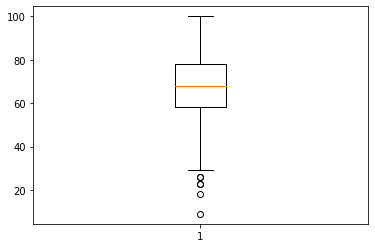

In [15]:
plt.boxplot(data['mean score'])

# plotting different columns in Histogram

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>,
        <AxesSubplot:title={'center':'mean score'}>]], dtype=object)

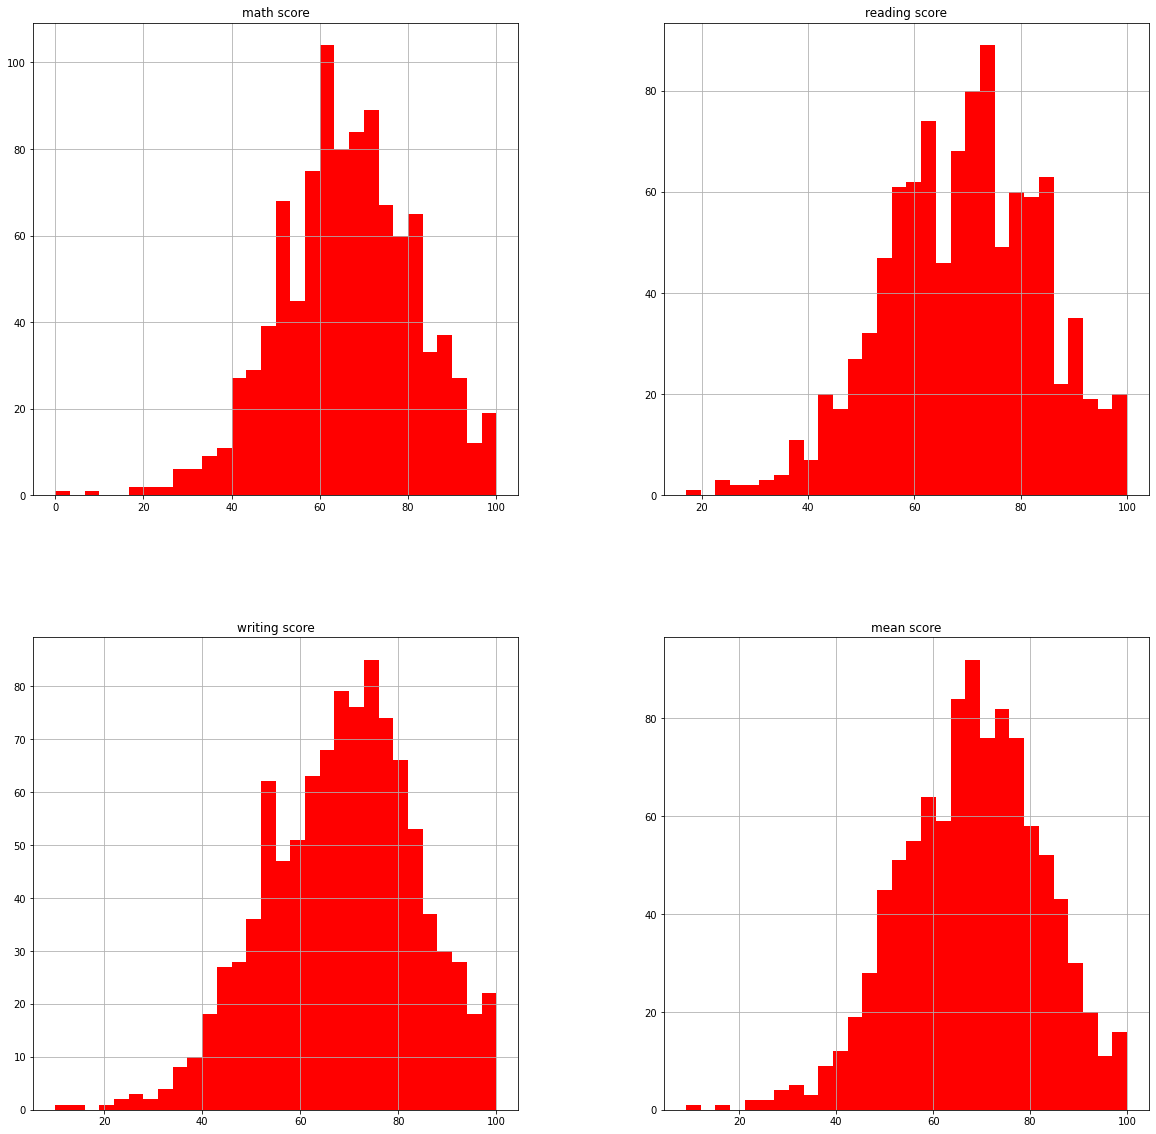

In [17]:
## plotting different columns in Histogram:
data.hist(bins=30,figsize=(20,20),color= 'r')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

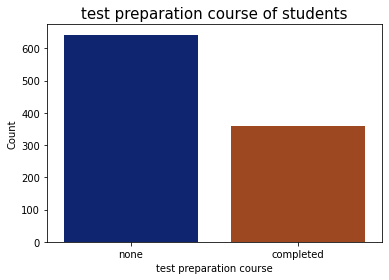

In [20]:
sns.countplot(data['test preparation course'], palette = 'dark')
plt.title("test preparation course of students",fontsize=15)
plt.ylabel('Count')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

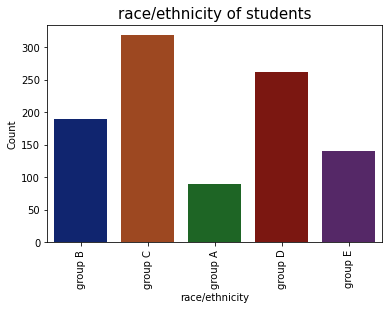

In [27]:
sns.countplot(data['race/ethnicity'], palette = 'dark')
plt.title("race/ethnicity of students",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0.5, 1.0, 'Heatmap of the dataset')

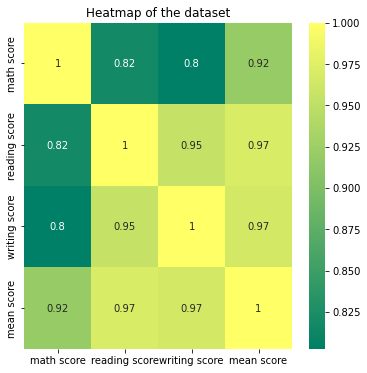

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,cmap='summer')
plt.title("Heatmap of the dataset")